# Realistic Charge Sensor
In this notebook, I will develop a model for the output of a realistic charge sensor. Two parallel nanowires will be simulated each with its own set of gates. The goal is to produce transport characterisitics of the two nanowires and get a working charge sensor output.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
def calc_gate_potential(x,y,gate_param):
    '''
    Calculates the potential at each point in x
    '''
    peak = gate_param['peak']
    pos_x = gate_param['pos_x']
    pos_y = gate_param['pos_y']
    rho = gate_param['rho']
    h = gate_param['h']
    screen = gate_param['screen']
    
    dx = np.sqrt((x-pos_x)**2 + (y[:,np.newaxis]-pos_y)**2)
    return -1.0*(peak/np.log(h/rho))*np.log(np.sqrt(dx**2 + h**2)/rho)*np.exp(-dx/screen)

def calc_potential(x,y,gate_dict):
    '''
    Calculates the potentials as sum from all gates in gate_dict
    '''
    for key,item in gate_dict.items():
        return np.sum([calc_gate_potential(x,y,gate) for key,gate in gate_dict.items()],axis=0)

## Gate Parameters
Define the voltages set to the gates and their positions here.

In [47]:
# all distances in nm
# depth of 2DEG 
h = 50
# radius of gates
rho = 5
# distance between dot nanowire and sensor nanowire
d = -50
# screening length
screen = 20

gate1_dot = {
    'peak'   : -100e-3,
    'pos_x'  : -20,
    'pos_y'  : 0,
    'rho'    : rho,
    'h'      : h,
    'screen' : screen,
}

gate2_dot = {
    'peak'   : 100e-3,
    'pos_x'  : 0,
    'pos_y'  : 0,
    'rho'    : rho,
    'h'      : h,
    'screen' : screen,
}
gate3_dot = {
    'peak'   : -100e-3,
    'pos_x'  : 20,
    'pos_y'  : 0,
    'rho'    : rho,
    'h'      : h,
    'screen' : screen,
}

gate1_sensor = {
    'peak'   : -30e-3,
    'pos_x'  : -15,
    'pos_y'  : d,
    'rho'    : rho,
    'h'      : h,
    'screen' : screen,
}

gate2_sensor = {
    'peak'   : -30e-3,
    'pos_x'  : 15,
    'pos_y'  : d,
    'rho'    : rho,
    'h'      : h,
    'screen' : screen,
}

gate_dict = {
    'gate1_dot' : gate1_dot,
    'gate2_dot' : gate2_dot,
    'gate3_dot' : gate3_dot,
    'gate1_sensor' : gate1_sensor,
    'gate2_sensor' : gate2_sensor,
}

# Potential Profile Calculation
Once the gates are defined, I will calculate the potential profile as a function of x at two y-values (y = 0 and y = d) corresponding the dot and sensor nanowire. 

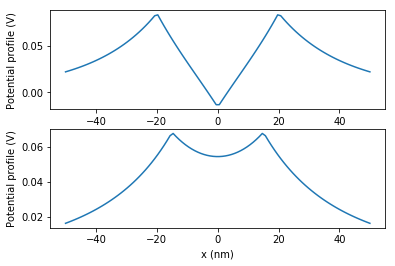

In [48]:
x = np.linspace(-50,50,100)

V1 = calc_potential(x,np.array([0]),gate_dict).flatten()
V2 = calc_potential(x,np.array([d]),gate_dict).flatten()

fig,axarr = plt.subplots(2,1)
axarr[0].plot(x,V1)
axarr[0].set_xlabel('x (nm)')
axarr[0].set_ylabel('Potential profile (V)')

axarr[1].plot(x,V2)
axarr[1].set_xlabel('x (nm)')
axarr[1].set_ylabel('Potential profile (V)')

# 2D map of potential
In order to just see how the potential looks in the 2DEG, I will calculate it in the full plane.

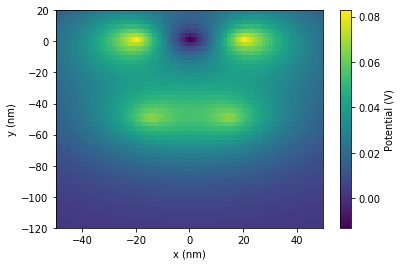

In [49]:
x = np.linspace(-50,50,100)
y = np.linspace(-120,20)
V_map = calc_potential(x,y,gate_dict)

XX,YY = np.meshgrid(x,y)
plt.pcolor(XX,YY,V_map)
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')
cbar = plt.colorbar()
cbar.set_label('Potential (V)')